
# Robust Regression

**Robust regression** is a type of regression analysis designed to be less sensitive to outliers in the data. Traditional linear regression methods, such as ordinary least squares (OLS), can be heavily influenced by outliers, leading to biased estimates of the model parameters. Robust regression techniques aim to provide more reliable estimates in the presence of outliers or violations of the assumptions of linear regression.

## Types of Robust Regression

There are several types of robust regression techniques, including:

1.  **Huber Regression**: Combines the ideas of least squares and least absolute deviations. It uses a quadratic loss function for small residuals and a linear loss function for large residuals, making it less sensitive to outliers.
2.  **RANSAC (Random Sample Consensus)**: An iterative method that fits a model to a subset of the data, repeatedly selecting random samples and estimating the model parameters. It identifies inliers and outliers based on the fit.
3.  *Theil-Sen Estimator*: A non-parametric method that estimates the slope of the regression line by calculating the median of the slopes of all pairs of points. It is robust to outliers and provides a more reliable estimate of the slope.
4.  *Quantile Regression*: Estimates the conditional quantiles of the dependent variable, allowing for a more comprehensive understanding of the relationship between variables, especially in the presence of outliers.
5.  *Least Trimmed Squares (LTS)*: Minimizes the sum of the smallest squared residuals, effectively ignoring a specified percentage of the largest residuals, which are likely to be outliers.

## Practical Demonstration

We will now demonstrate how to implement robust regression using the Huber regression method from the `scikit-learn` library. We will use a synthetic dataset with outliers for this purpose.

-   Create a synthetic dataset with outliers

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Independent variable
y = 2 * X + 5 + np.random.randn(100, 1)     # Dependent variable with noise

# Introduce outliers
y[::20] += 500 * np.random.randn(5, 1)      # Add large noise to every 20th point

# Create DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'],
                                                    test_size=0.2,
                                                    random_state=42)

-   Fit a traditional linear regression model for comparison

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (β0): {model.intercept_:.2f}")
print(f"Slope (β1): {model.coef_[0]:.2f}")

Intercept (β0): -29.66
Slope (β1): 6.77


-   Make predictions and evaluate the traditional linear regression model

Mean Absolute Error (MAE): 92.33
Mean Squared Error (MSE): 65633.92
Root Mean Squared Error (RMSE): 256.19
R-squared (R^2): -0.09


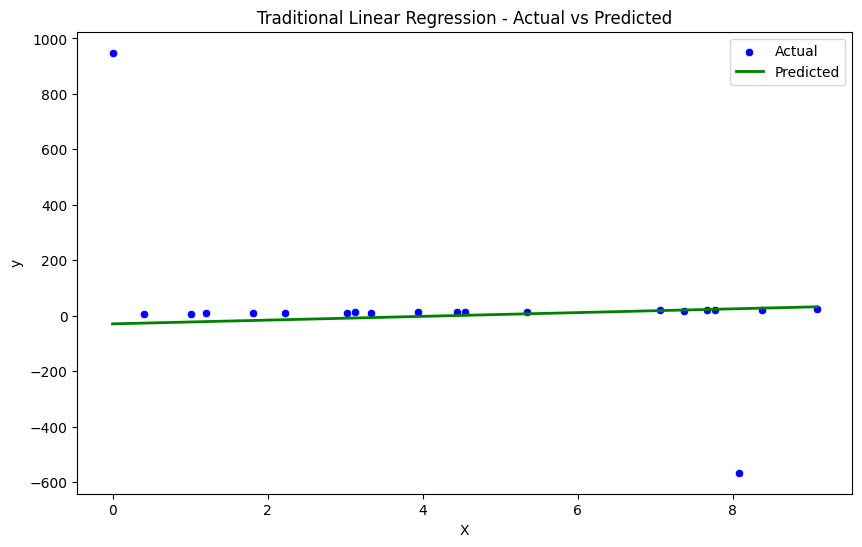

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='green', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Traditional Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

-   Fit a robust regression model using Huber regression

In [4]:
from sklearn.linear_model import HuberRegressor
robust_model = HuberRegressor()
robust_model.fit(X_train, y_train)

print(f"Intercept (β0): {robust_model.intercept_:.2f}")
print(f"Slope (β1): {robust_model.coef_[0]:.2f}")

Intercept (β0): 5.00
Slope (β1): 2.03


-   Make predictions and evaluate the robust regression model

Mean Absolute Error (MAE): 77.33
Mean Squared Error (MSE): 61779.20
Root Mean Squared Error (RMSE): 248.55
R-squared (R^2): -0.03


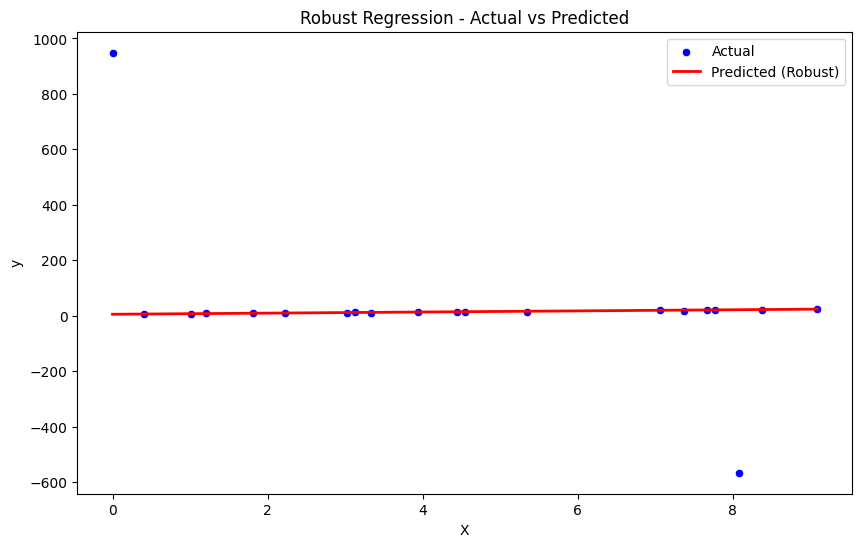

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_robust = robust_model.predict(X_test)

mae_robust = mean_absolute_error(y_test, y_pred_robust)
mse_robust = mean_squared_error(y_test, y_pred_robust)
rmse_robust = np.sqrt(mse_robust)
r2_robust = robust_model.score(X_test, y_test)

print(f"Mean Absolute Error (MAE): {mae_robust:.2f}")
print(f"Mean Squared Error (MSE): {mse_robust:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_robust:.2f}")
print(f"R-squared (R^2): {r2_robust:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred_robust, color='red', label='Predicted (Robust)', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Robust Regression - Actual vs Predicted')
plt.legend()
plt.show()

-   Compare the performance of the robust regression model with the traditional linear regression model

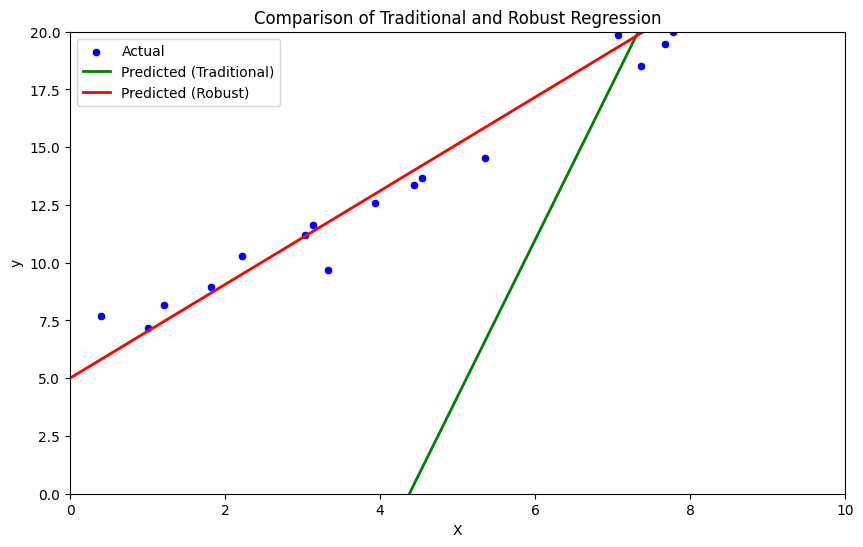

In [6]:
# Plot the results for comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='green', label='Predicted (Traditional)', linewidth=2)
sns.lineplot(x=X_test.squeeze(), y=y_pred_robust, color='red', label='Predicted (Robust)', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 20)
plt.title('Comparison of Traditional and Robust Regression')
plt.legend()
plt.show()

## Hands-on Exercises

Create a model using RANSAC (Random Sample Consensus) robust regression method on the same dataset. Compare its performance with the traditional and Huber regression models.

-   Fit a RANSAC regression model

In [7]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac_model = RANSACRegressor()
ransac_model.fit(X_train, y_train)

print(f"Intercept (β0): {ransac_model.estimator_.intercept_:.2f}")
print(f"Slope (β1): {ransac_model.estimator_.coef_[0]:.2f}")

Intercept (β0): 5.16
Slope (β1): 2.00


-   Make predictions and evaluate the RANSAC regression model

Mean Absolute Error (MAE): 77.29
Mean Squared Error (MSE): 61762.22
Root Mean Squared Error (RMSE): 248.52
R-squared (R^2): -0.03


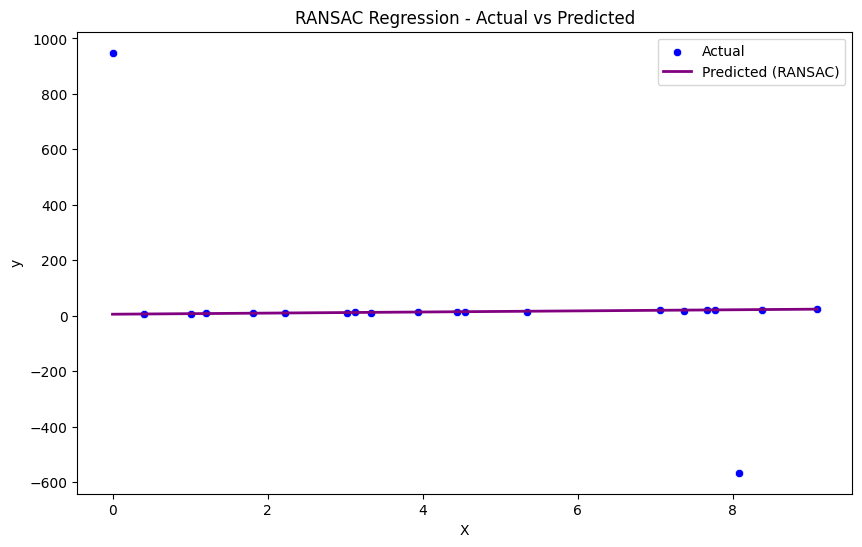

In [8]:
y_pred_ransac = ransac_model.predict(X_test)

mae_ransac = mean_absolute_error(y_test, y_pred_ransac)
mse_ransac = mean_squared_error(y_test, y_pred_ransac)
rmse_ransac = np.sqrt(mse_ransac)
r2_ransac = ransac_model.score(X_test, y_test)

print(f"Mean Absolute Error (MAE): {mae_ransac:.2f}")
print(f"Mean Squared Error (MSE): {mse_ransac:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ransac:.2f}")
print(f"R-squared (R^2): {r2_ransac:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred_ransac, color='purple', label='Predicted (RANSAC)', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('RANSAC Regression - Actual vs Predicted')
plt.legend()
plt.show()

-   Compare the performance of the RANSAC regression model with the traditional and Huber robust regression models

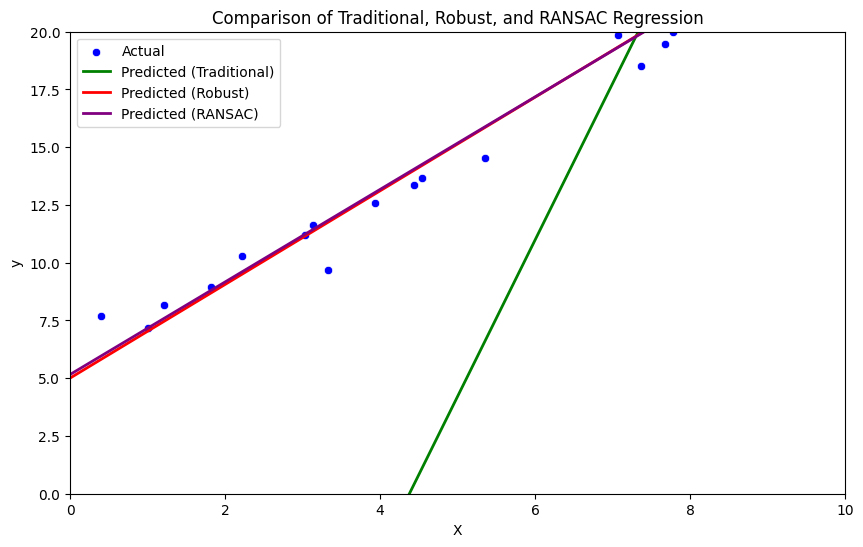

In [9]:
# Plot the results for comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='green', label='Predicted (Traditional)', linewidth=2)
sns.lineplot(x=X_test.squeeze(), y=y_pred_robust, color='red', label='Predicted (Robust)', linewidth=2)
sns.lineplot(x=X_test.squeeze(), y=y_pred_ransac, color='purple', label='Predicted (RANSAC)', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 20)
plt.title('Comparison of Traditional, Robust, and RANSAC Regression')
plt.legend()
plt.show()

## Summary

In this section, we introduced robust regression, a technique designed to be less sensitive to outliers in the data. We demonstrated how to implement robust regression using the Huber regression method from the `scikit-learn` library and evaluated its performance on a synthetic dataset with outliers.

Robust regression techniques are essential for ensuring reliable estimates in the presence of outliers or violations of the assumptions of linear regression.